# matplotlib의 여러가지 플롯

matplotlib는 기본적인 라인 플롯 이외에도 다양한 챠트/플롯 유형을 지원한다.

## matplotlib의 한글 적용

matplotlib에서 한글을 사용하려면 다음과 같이 한글 폰트를 적용해야 한다. 당연히 해당 폰트는 컴퓨터에 깔려 있어야 한다. 여기에서는 나눔고딕 폰트를 사용하였다.

또한 matplotlib 명령에서는 유니코드 문자열을 사용해야 한다.

In [71]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

#mpl.matplotlib_fname()
mpl.rc('font', family='AppleGothic') #NanumGothic

## 바 차트

x, y 데이터 중 하나가 카테고리 값인 경우에는 bar 명령과 barh 명령으로 바 차트(bar chart) 시각화를 할 수 있다. 가로 방향으로 바 차트를 그리려면 barh 명령을 사용한다.

자세한 내용은 다음 웹사이트를 참조한다.

- http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.bar
- http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.barh

바 차트 작성시 주의점은 첫번째 인수인 left 가 x축에서 바(bar)의 왼쪽 변의 위치를 나타낸다는 점이다. 바의 위치를 xtick 위치의 중앙으로 옮기려면 align='center' 인수를 지정해야 한다.

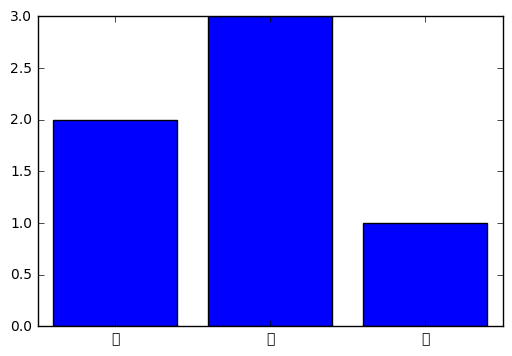

In [69]:
y = [2, 3, 1]
x = np.arange(len(y))
xlabel = [u'가', u'나', u'다']
plt.bar(x, y, align='center')
plt.xticks(x, xlabel)
plt.show()

xerr 인수나 yerr 인수를 지정하면 에러 바(error bar)를 추가할 수 있다.

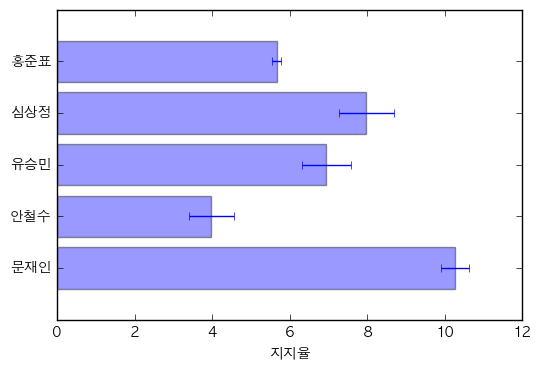

In [3]:
people = ('문재인', '안철수', '유승민', '심상정', '홍준표')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('지지율')
plt.show()

두 개 이상의 바 차트를 한번에 그리는 경우도 있다.

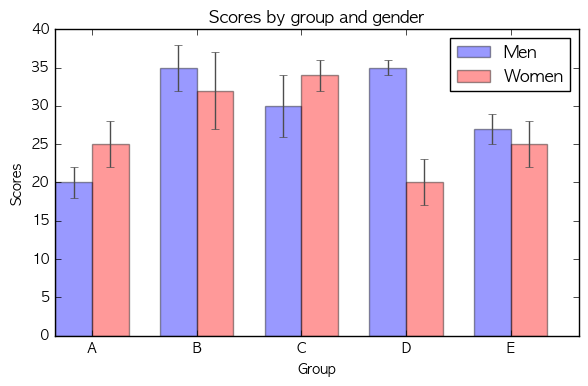

In [5]:
n_groups = 5
means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)
means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_men,
                 error_kw=error_config,
                 label='Men')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_women,
                 error_kw=error_config,
                 label='Women')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'E'))
plt.legend()

plt.tight_layout()
plt.show()

또는 bottom 인수로 바의 위치를 조정하여 겹친 바 차트(stacked bar chart)도 그릴 수 있다.

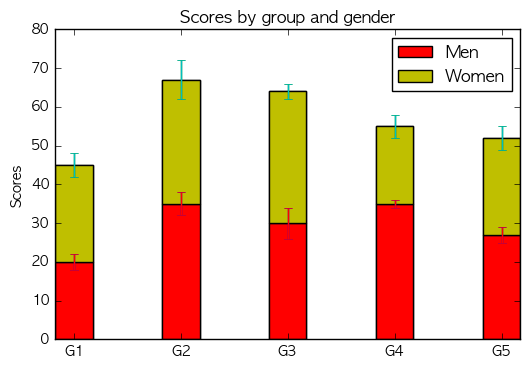

In [7]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='r', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width, color='y',
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind + width/2., ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))
#plt.show()

## 파이 차트

카테고리 별 값의 상대적인 비교를 해야 할 때는 pie 명령으로 파이 차트(pie chart)를 그릴 수 있다.

- http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.pie

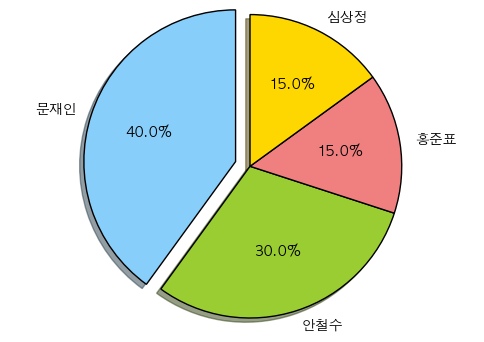

In [34]:
labels = '문재인', '안철수', '홍준표', '심상정'
sizes = [40, 30, 15, 15]
colors = ['lightskyblue', 'yellowgreen', 'lightcoral', 'Gold']
explode = (0.1, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

## 히스토그램

히스토그램을 그리기 위한 hist 명령도 제공한다. hist 명령은 bins 인수로 데이터 집계 구간을 받는다. 또한 반환값으로 데이터 집계 결과를 반환해주므로 이 결과를 다른 코드에서 사용할 수도 있다.

- http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.hist

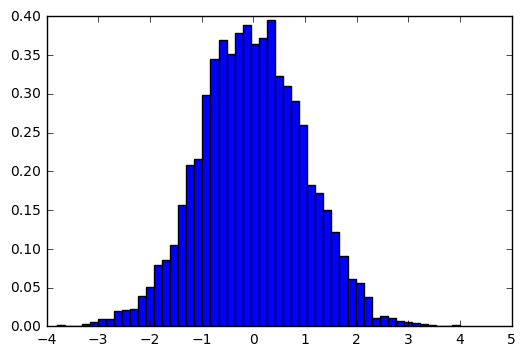

In [42]:
mpl.rc('font', family='sans-serif')

x = np.random.randn(5000)
arrays, bins, patches = plt.hist(x, bins=50, normed=True)
plt.show()

## 스캐터 플롯

두 개의 데이터 집합, 예를 들면 두 벡터의 상관관계를 살펴보려면 scatter 명령으로 스캐터 플롯을 그린다.

- http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.scatter

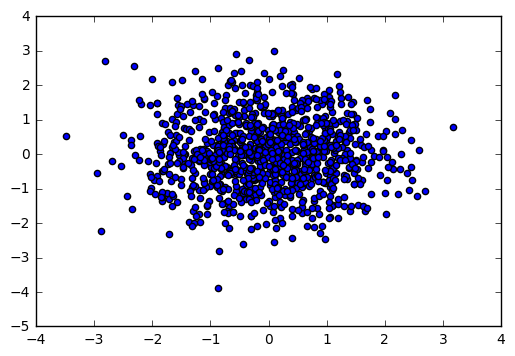

In [43]:
X = np.random.normal(0,1,1024)
Y = np.random.normal(0,1,1024)
plt.scatter(X,Y)
plt.show()

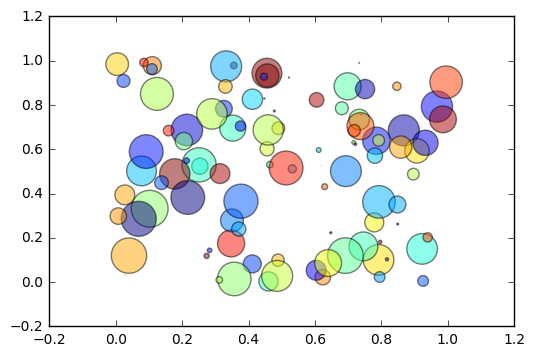

In [45]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2 
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

## 컨투어 플롯

2차원 자료를 시각화하는 또다른 방법은 명암이 아닌 등고선(contour)을 사용하는 방법이다. contour 혹은 contourf 명령을 사용한다.

- http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.contour
- http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.contourf

In [46]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
XX, YY = np.meshgrid(x, y)
ZZ = f(XX, YY)

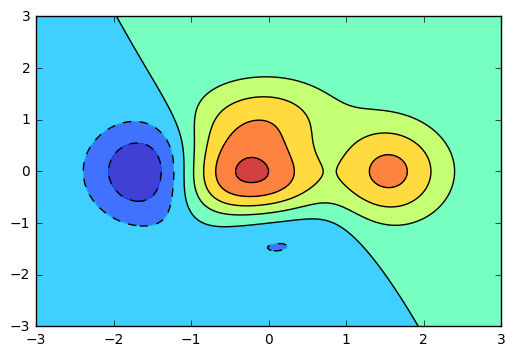

In [49]:
plt.contourf(XX, YY, ZZ, alpha=.75, cmap='jet')
plt.contour(XX, YY, ZZ, colors='black', linewidth=.5)
plt.show()

## 3D 서피스 플롯

입력 변수가 x, y 두 개이고 출력 변수가 z 하나인 경우에는 3차원 자료가 된다. 3차원 플롯은 일반 플롯과 달리 Axes3D라는 3차원 전용 axes를 생성해야 한다.

plot_wireframe, plot_surface 명령을 사용한다.

- http://matplotlib.org/1.5.1/mpl_toolkits/mplot3d/api.html#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_wireframe
- http://matplotlib.org/1.5.1/mpl_toolkits/mplot3d/api.html#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface

In [50]:
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
XX, YY = np.meshgrid(X, Y)
RR = np.sqrt(XX**2 + YY**2)
ZZ = np.sin(RR)

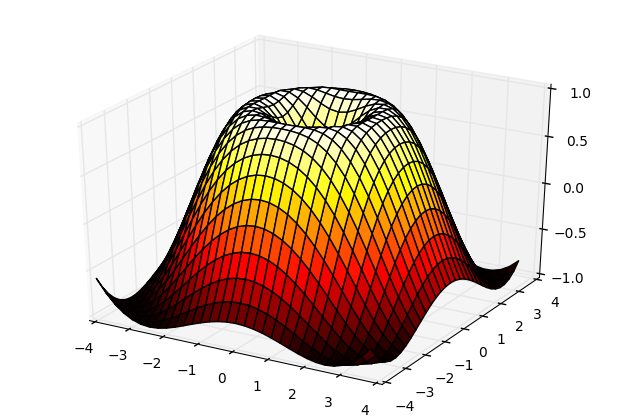

In [51]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot')
plt.show()